Comments are written in Python with a hash mark # or triple quotes """ in the case of multiple comments. Comments are ignored by Python.

In [10]:
# see Materials < Section 1 p.1

import numpy as np # import the package numpy
import matplotlib.pyplot as plt # import the library matplotlib
import pandas as pd # import the package pandas
import seaborn as sb # import the library seaborn

In [11]:
#read the.csv file 'insurance' into a pandas data frame (see Materials < Section 1 p.2)
# display all rows of the pandas data frame with the function .set_option() of the pandas data frame

pd.set_option('display.max_rows', None)
dataset = pd.read_csv(r'C:\Users\mtsil\OneDrive\Documents\train.csv')


In [12]:
#check the dimensions of the pandas data frame with the shape attribute (see Materials < Section 1 p.3)

dataset.shape 

#there are 1338 rows and 7 columns, in other words 1338 samples (or records or observations) and 7 features (or variables)

(1460, 81)

In [13]:
#see the first 5 rows of your dataset with the function .head of pandas data frame (see Materials < Section 1 p.)

dataset.head()




,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
column_names = dataset.columns
column_names

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
from sklearn.pipeline import make_pipeline #from the module sklearn.pipeline import the class make_pipeline
from sklearn.impute import SimpleImputer #from the module sklearn.impute import the class SimpleImputer
from sklearn.preprocessing import OneHotEncoder #from the package sklearn.preprocessing import the class OneHotEncoder
from sklearn.compose import ColumnTransformer #from the module sklearn.compose import the class ColumnTransformer

In [18]:
#see Materials

num_cols = dataset.select_dtypes(exclude=['object']).columns.tolist() #get the columns with the numerical data
cat_cols = dataset.select_dtypes(include=['object']).columns.tolist() #get the columns with the categorical data


In [19]:
# construct a pipeline to preprocess the numerical data
#create an instance of the class SimpleImputer and impute the missing numerical data with the median along each column

num_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
)
# construct a pipeline to preprocess the categorical data
#create an instance of the class SimpleImputer and impute the missing categorical data with most_frequent value along each column
#set sparse parameter to False to return a numpy array
#set handle_unknown parameter to ignore to encode unknown categories with zero
#the missing values are represented as NaN in the dataset

cat_pipeline = make_pipeline(
    SimpleImputer(missing_values = np.nan, strategy='most_frequent', fill_value = 'missing'),
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)


In [21]:
"""
combine both the pipelines
pass in the ColumnTransformer the columns and their transformations as a list of tuples
set the remainder parameter to passthrough in order for the non-specified columns to be passed through

"""
combined_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
], remainder = 'passthrough')


In [22]:
# call the fit_transform method 
transformed_dataset = combined_pipeline.fit_transform(dataset) 


c:\users\mtsil\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
#call the get_feature_names_out () method on the ColumnTransformer to extract teh feature names from the ColumnTransformer
feature_names = combined_pipeline.get_feature_names_out() 


In [24]:
#convert the transformed dataset into a pandas dataset

final_dataset = pd.DataFrame(transformed_dataset, columns = feature_names)
final_dataset.head()


,num__Id,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,...,cat__SaleType_ConLw,cat__SaleType_New,cat__SaleType_Oth,cat__SaleType_WD,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
#drop duplicate rows except the first occurence of a duplicate row (see Materials < Section 1 p.4)
#set the parameter inplace to True in order to modify your current data frame instead of creating a new
dataset.drop_duplicates(inplace = True)

In [6]:
#detect any missing values in the columns of your pandas data frame (see Materials < Section 1 < p.5)

dataset.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [ ]:
missing_vals = (X_train.isnull().sum())
print(missing_vals[missing_vals >0])

In [ ]:
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

print("Columns with missing values :", cols_with_missing)
print("X_train_ful shape :", X_train.shape)

X_train.info

In [ ]:
#drop all rows which contain missing values (see Materials < Section 1 < p.5)

dataset.dropna(inplace = True)
dataset

In [ ]:
"""
reset the index of the new_dataframe and set the parameter drop to True 
in order not to add the current row index as a new column in the pandas DataFrame

"""

new_dataframe = dataset.reset_index(drop=True)
new_dataframe

In [412]:
vis_outliers = new_dataframe.drop(['sex', 'smoker', 'region'], axis=1)
vis_outliers

,age,bmi,children,charges
0,19,27.900,0,16884.924000
1,18,33.770,1,1725.552300
2,28,33.000,3,4449.462000
3,33,22.705,0,21984.470610
4,32,28.880,0,3866.855200
5,31,25.740,0,3756.621600
6,46,33.440,1,8240.589600
7,37,27.740,3,7281.505600
8,37,29.830,2,6406.410700
9,60,25.840,0,28923.136920


In [422]:
vis_outliers = new_dataframe.drop(['sex', 'smoker', 'region'], axis=1)
vis_outliers

KeyError: "['sex', 'smoker', 'region'] not found in axis"

In [413]:
vis_outliers.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


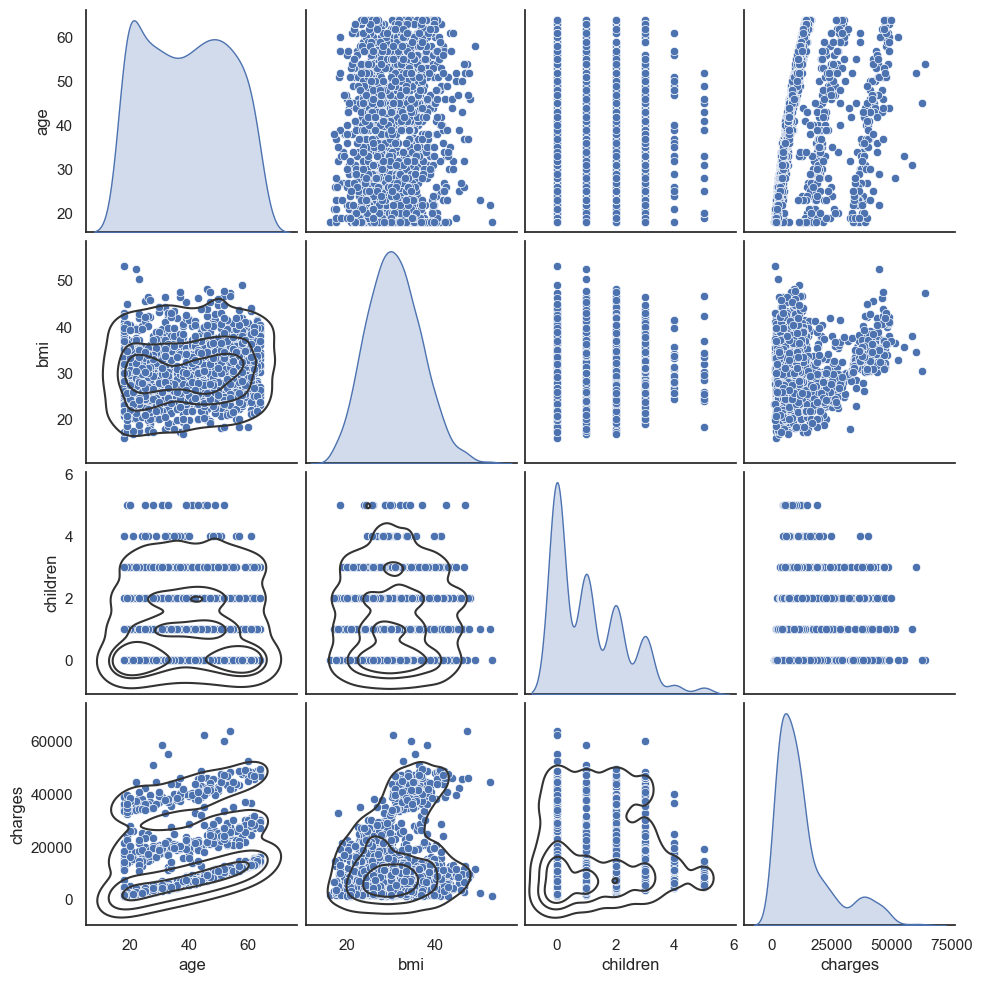

In [403]:
import seaborn as sb
g = sns.pairplot(vis_outliers, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [307]:
#check the number of rows of the new data frame after removing the duplicate rows and rows with missing values

new_dataframe.shape

#the number of rows went down to 1337, which means that one duplicate row has been removed from our pandas data frame

(1337, 7)

In [251]:
#check the data types of each column (see Materials < Section 1 p.3)

new_dataframe.dtypes

#for example, the data type of the column'age' is integer

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [252]:
#check how many times the values of each feature occur in the entire dataset (see Materials < Section 1 p.3)

new_dataframe['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [ ]:
#percent of missing values
countofnulls = df.isnull().sum().sum()
print(“countofnulls is”,countofnulls)
#Percentage of nulls 
totalelements = df.count().sum()
percentageofnulls=(countofnulls*100/totalelements)
print(“percentageofnulls is”,percentageofnulls)